<a href="https://colab.research.google.com/github/majdalotaibi/NLP/blob/main/NLP_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NLP Course** 🐣

---



## Text Preprocessing

### 1. Lowercase

In [ ]:
sentence = "Her cat`s name is Luna"
lower_sentence = sentence.lower()
print(lower_sentence)

her cat`s name is luna


In [ ]:
sentence_list = ['Could you pass me the TV remote?',
                 'It is IMPOSSIBLE to find this hotel',
                 'Want to go for dinner on Tuesday?']

lower_sentence_list = [x.lower() for x in sentence_list]

print(lower_sentence_list)

['could you pass me the tv remote?', 'it is impossible to find this hotel', 'want to go for dinner on tuesday?']


### 2. Removing Stopwords

In [ ]:
# import packages
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# assign our stop words to a variable
en_stopwords = stopwords.words('english')

# print the list of stop words to see what we will be removing
print(en_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
sentence = "it was too far to go to the shop and he did not want her to walk"

In [ ]:
# keep the words in the sentance if the word is not in the list of stop words
sentance_no_stopwords = ' '.join([word for word in sentence.split() if word not in (en_stopwords)])
print(sentance_no_stopwords)

far go shop want walk


In [ ]:
# removing stop words from list
en_stopwords.remove("did")
en_stopwords.remove("not")

In [ ]:
# add custom stop words
en_stopwords.append("go")

In [ ]:
sentance_no_stopwords_custom = ' '.join([word for word in sentence.split() if word not in (en_stopwords)])
print(sentance_no_stopwords_custom)

far shop did not want walk


### 3. Regular Expressions

**Raw Strings**

Python recognises certain characters to have a special meaning, for example, \n in python is used to indicate a new line. However, sometimes these codes that python recognises to have certain meanings appear in our strings and we want to tell python that a \n in our text is a literal \n, rather than meaning a new line.

We can use the 'r' character before strings to indicate to python that our text is what is known as a "raw string".

In [ ]:
# print text without using raw string indicator
my_folder = "C:\desktop\notes"
print(my_folder)

C:\desktop
otes


In [ ]:
# include raw string indicator
my_folder = r"C:\desktop\notes"
print(my_folder)

C:\desktop\notes


**re.search**

re.search is a function which allows us to check if a certain pattern is in a string. It uses the logic re.search("pattern to find", "string to find it it"). It will return the pattern if it is found in the string, or else it will return None if the pattern is not found.

In [ ]:
import re
result_search = re.search("pattern", r"string containing the pattern")
print(result_search)

<re.Match object; span=(22, 29), match='pattern'>


In [ ]:
print(result_search.group()) # returns just the matching pattern

pattern


In [ ]:
result_search = re.search("pattern",r"the phrase to find isn't in this string")
print(result_search) # returns None

None


**re.sub**

re.sub allows us to find certain text and replace it. It uses the logic re.sub("pattern to find", "replacement text", "string").

In [ ]:
string = r"sara was able to help me find the items i needed quickly"

new_string = re.sub(r"sara", r"sarah", string) # replace the incorrect spelling of sarah
print(new_string)

sarah was able to help me find the items i needed quickly


**Regex Syntax**

The real power of regex is being able to leverage the syntax to create more complex searches/replacements.

In [ ]:
customer_reviews = ['sam was a great help to me in the store',
                    'the cashier was very rude to me, I think her name was eleanor',
                    'amazing work from sadeen!',
                    'sarah was able to help me find the items i needed quickly',
                    'lucy is such a great addition to the team',
                    'great service from sara she found me what i wanted'
                   ]

Find only sarah's reviews

In [ ]:
sarahs_reviews = []
pattern_to_find = r"sarah?"
# the ? after r means it is an optional character to match, so our search will look for sarah and sara

for string in customer_reviews:
    if (re.search(pattern_to_find, string)):
        sarahs_reviews.append(string)

print(sarahs_reviews)

['sarah was able to help me find the items i needed quickly', 'great service from sara she found me what i wanted']


Find reviews that start with the letter a

In [ ]:
a_reviews = []
pattern_to_find = r"^a" # the ^ operator to indicates the start of a strin

for string in customer_reviews:
  if (re.search(pattern_to_find,string)):
      a_reviews.append(string)

print(a_reviews)


['amazing work from sadeen!']


Find reviews that end with the letter y

In [ ]:
y_reviews = []
pattern_to_find = r"y$" # the $ operator to indicate the end of a string

for string in customer_reviews:
    if (re.search(pattern_to_find, string)):
        y_reviews.append(string)

print(y_reviews)

['sarah was able to help me find the items i needed quickly']


Find reviews that contain the words needed or wanted

In [ ]:
needwant_reviews = []
pattern_to_find = r"(need|want)ed"
# the pipe operator | can be used to mean OR

for string in customer_reviews:
    if (re.search(pattern_to_find, string)):
        needwant_reviews.append(string)

print(needwant_reviews)

['sarah was able to help me find the items i needed quickly', 'great service from sara she found me what i wanted']


Remove anything from the review that isn't a word or a space (i.e. remove punctuation)

In [ ]:
no_punct_reviews = []
pattern_to_find = r"[^\w\s]"
# [^ ] means "not", \w means word and \s means whitespace: so find anything that is not a word or a space

for string in customer_reviews:
    no_punct_string = re.sub(pattern_to_find, "", string)
    no_punct_reviews.append(no_punct_string)

print(no_punct_reviews)

['sam was a great help to me in the store', 'the cashier was very rude to me I think her name was eleanor', 'amazing work from sadeen', 'sarah was able to help me find the items i needed quickly', 'lucy is such a great addition to the team', 'great service from sara she found me what i wanted']


### 4. Tokenizing Text

Fundamental step in NLP involves converting our text into smaller units through a process known as tokenization. These smaller units are known as our tokens. Word tokenization is the most common form of tokenization, where individual words in the text becomes a token, but tokens can also be sentences, sub words or individual characters depending on your use case.

Why do we do this? The meaning of the overall text is better understood if we can analyse and understand the individual parts as well as the whole. It's also an important step before we vecotrize our data, which we'll cover more in the next section of this course.

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


**Sentance tokenization**

In [ ]:
sentences = "Her cat's name is Luna. Her dog's name is max"
sent_tokenize(sentences)

["Her cat's name is Luna.", "Her dog's name is max"]

**Word tokenization**

In [ ]:
sentence = "Her cat's name is Luna"
word_tokenize(sentence)

['Her', 'cat', "'s", 'name', 'is', 'Luna']

Notice how "cat's" has been split into 2 tokens. This may be fine for your task but it is definitely something to keep in mind when you are preprocessing any text data - you might want to remove punctuation or replace contractions before tokenizing.

### 5. Stemming

The next step in preprocessing is to standardise the text. One option for this is stemming, where words are reduced to their base form. For example, words like ‘connecting’ or ‘connected’ will be stemmed to the base form ‘connect’. Stemming works by removing suffix/ending of word but can sometimes lead to the base form not being meaningful or a proper word.

We standardize the text in this way because it will lower the number of unique words in our dataset; therefore reducing the size and complexity of our data. Removing complexity and noise from the data is an important step for preparing our data properly for machine learning.

In [ ]:
from nltk.stem import PorterStemmer

In [ ]:
# create stemmer
ps = PorterStemmer()

connect_tokens = ['connecting', 'connected', 'connectivity', 'connect', 'connects']

for t in connect_tokens:
    print(t, " : ", ps.stem(t))

connecting  :  connect
connected  :  connect
connectivity  :  connect
connect  :  connect
connects  :  connect


Another Examples

In [ ]:
learn_tokens = ['learned', 'learning', 'learn', 'learns', 'learner', 'learners']

for t in learn_tokens:
    print(t, " : ", ps.stem(t))

for t in learn_tokens:
    print(t, " : ", ps.stem(t))

learned  :  learn
learning  :  learn
learn  :  learn
learns  :  learn
learner  :  learner
learners  :  learner
learned  :  learn
learning  :  learn
learn  :  learn
learns  :  learn
learner  :  learner
learners  :  learner


In [ ]:
likes_tokens = ['likes', 'better', 'worse']

for t in likes_tokens:
    print(t, " : ", ps.stem(t))

likes  :  like
better  :  better
worse  :  wors


### 6. Lemmatization

Where stemming removes the last few characters of a word, lemmatization stems the word to a more meaningful base form and ensures it does not lose it's meaning. Lemmatization works more intelligently, referencing a pre-defined dictionary containing the context of words and uses this when diminishing the word to the base form.

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# create lemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
for t in connect_tokens:
    print(t, " : ", lemmatizer.lemmatize(t))

connecting  :  connecting
connected  :  connected
connectivity  :  connectivity
connect  :  connect
connects  :  connects


In [ ]:
for t in learn_tokens:
    print(t, " : ", lemmatizer.lemmatize(t))

learned  :  learned
learning  :  learning
learn  :  learn
learns  :  learns
learner  :  learner
learners  :  learner


In [ ]:
for t in likes_tokens:
    print(t, " : ", lemmatizer.lemmatize(t))

likes  :  like
better  :  better
worse  :  worse


### 7. N-grams

We can break our text down into n-grams to check our preprocessing, explore the contents of our data, or create new features for machine learning. An n-gram is simply a sequence of neighbouring n words (or tokens), where n can be any number.

In [ ]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
tokens = ['the', 'rise', 'of', 'artificial', 'intelligence', 'has', 'led', 'to', 'significant', 'advancements', 'in', 'natural', 'language', 'processing', 'computer', 'vision', 'and', 'other', 'fields', 'machine', 'learning', 'algorithms', 'are', 'becoming', 'more', 'sophisticated', 'enabling', 'computers', 'to', 'perform', 'complex', 'tasks', 'that', 'were', 'once', 'thought', 'to', 'be', 'the', 'exclusive', 'domain', 'of', 'humans', 'with', 'the', 'advent', 'of', 'deep', 'learning', 'neural', 'networks', 'have', 'become', 'even', 'more', 'powerful', 'capable', 'of', 'processing', 'vast', 'amounts', 'of', 'data', 'and', 'learning', 'from', 'it', 'in', 'ways', 'that', 'were', 'not', 'possible', 'before', 'as', 'a', 'result', 'ai', 'is', 'increasingly', 'being', 'used', 'in', 'a', 'wide', 'range', 'of', 'industries', 'from', 'healthcare', 'to', 'finance', 'to', 'transportation', 'and', 'its', 'impact', 'is', 'only', 'set', 'to', 'grow', 'in', 'the', 'years', 'to', 'come']
print(tokens)

['the', 'rise', 'of', 'artificial', 'intelligence', 'has', 'led', 'to', 'significant', 'advancements', 'in', 'natural', 'language', 'processing', 'computer', 'vision', 'and', 'other', 'fields', 'machine', 'learning', 'algorithms', 'are', 'becoming', 'more', 'sophisticated', 'enabling', 'computers', 'to', 'perform', 'complex', 'tasks', 'that', 'were', 'once', 'thought', 'to', 'be', 'the', 'exclusive', 'domain', 'of', 'humans', 'with', 'the', 'advent', 'of', 'deep', 'learning', 'neural', 'networks', 'have', 'become', 'even', 'more', 'powerful', 'capable', 'of', 'processing', 'vast', 'amounts', 'of', 'data', 'and', 'learning', 'from', 'it', 'in', 'ways', 'that', 'were', 'not', 'possible', 'before', 'as', 'a', 'result', 'ai', 'is', 'increasingly', 'being', 'used', 'in', 'a', 'wide', 'range', 'of', 'industries', 'from', 'healthcare', 'to', 'finance', 'to', 'transportation', 'and', 'its', 'impact', 'is', 'only', 'set', 'to', 'grow', 'in', 'the', 'years', 'to', 'come']


In [ ]:
# unigrams: n=1
unigrams = (pd.Series(nltk.ngrams(tokens, 1)).value_counts())
print(unigrams)

(to,)          7
(of,)          6
(the,)         4
(in,)          4
(learning,)    3
              ..
(humans,)      1
(rise,)        1
(advent,)      1
(deep,)        1
(come,)        1
Length: 79, dtype: int64


Text(0.5, 0, '# of Occurances')

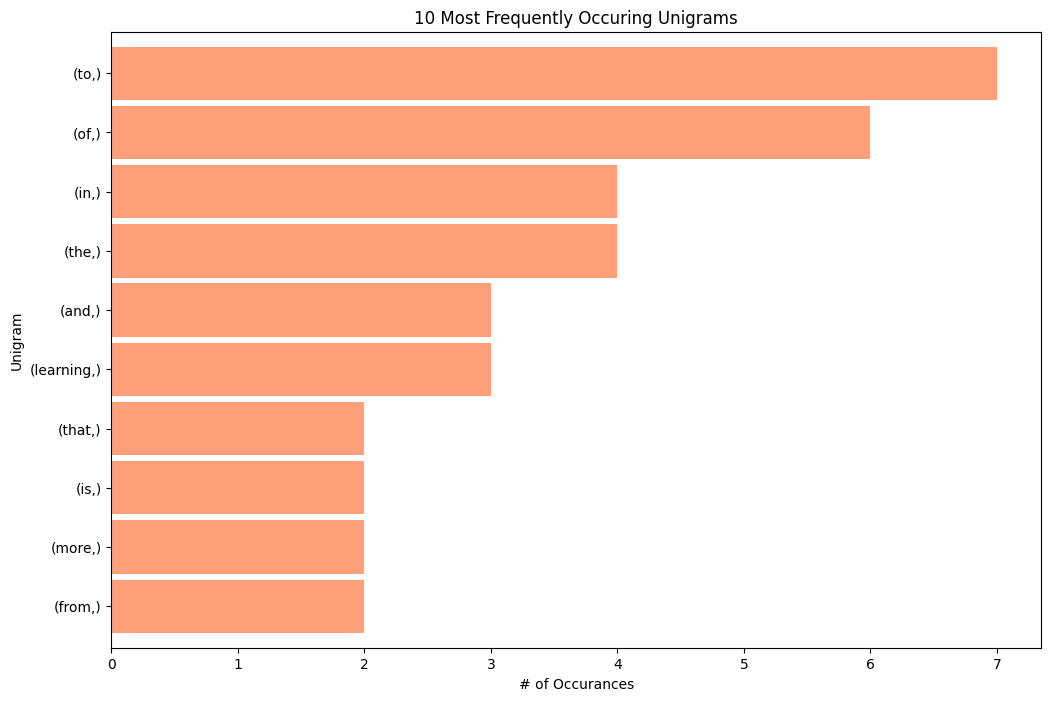

In [ ]:
unigrams[0:10].sort_values().plot.barh(color='lightsalmon', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occuring Unigrams')
plt.ylabel('Unigram')
plt.xlabel('# of Occurances')

In [ ]:
# bigrams: n=2
bigrams = (pd.Series(nltk.ngrams(tokens, 2)).value_counts())
print(bigrams)

(that, were)             2
(the, rise)              1
(increasingly, being)    1
(ai, is)                 1
(result, ai)             1
                        ..
(tasks, that)            1
(complex, tasks)         1
(perform, complex)       1
(to, perform)            1
(to, come)               1
Length: 105, dtype: int64


Text(0.5, 0, '# of Occurances')

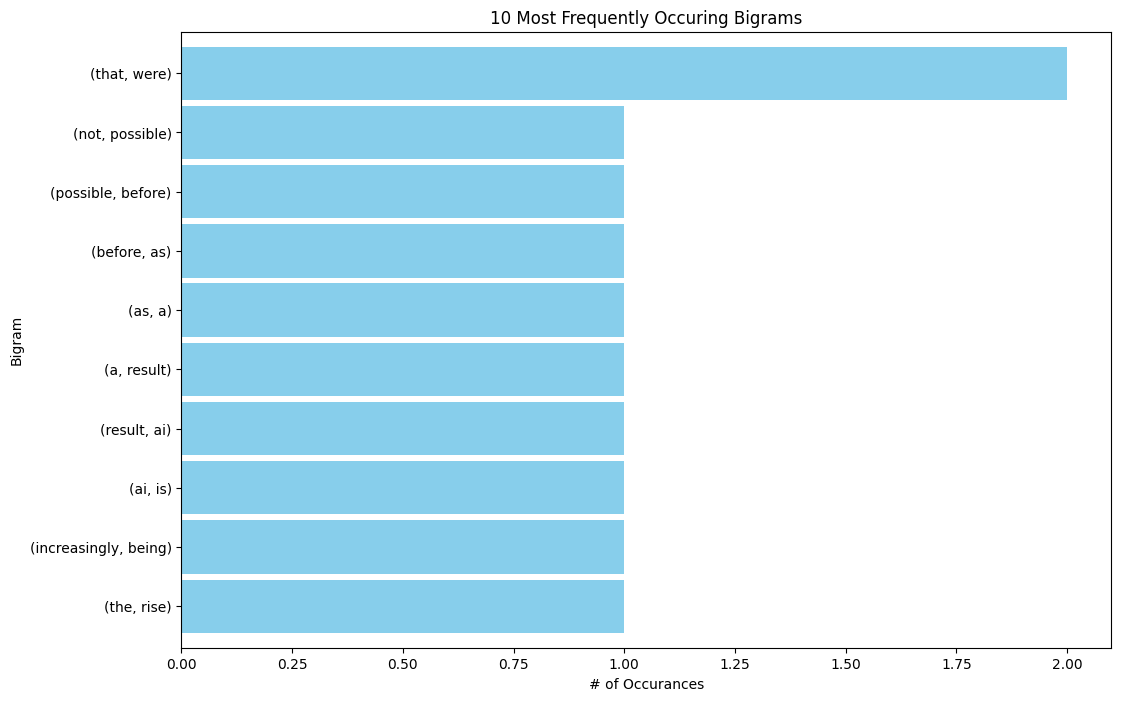

In [ ]:
bigrams[0:10].sort_values().plot.barh(color='skyblue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

In [ ]:
# trigrams: n=3
trigrams = (pd.Series(nltk.ngrams(tokens, 3)).value_counts())
print(trigrams)

(the, rise, of)              1
(even, more, powerful)       1
(ai, is, increasingly)       1
(result, ai, is)             1
(a, result, ai)              1
                            ..
(that, were, once)           1
(tasks, that, were)          1
(complex, tasks, that)       1
(perform, complex, tasks)    1
(years, to, come)            1
Length: 105, dtype: int64
